<img src = "https://github.com/exponentialR/DL4CV/blob/main/media/BMC_Summer_Course_Deep_Learning_for_Computer_Vision.jpg?raw=true" alt='BMC Summer Course' width='300'/>

# BMC Summer Course: Deep Learning for Computer Vision
## Walkthrough Excercise on YOLO for Object Detection

Author: Samuel A.


# Introduction


In this notebook, we will train a YOLOv5 model using the Ultralytics YOLO framework on a custom dataset.
YOLO (You Only Look Once) is a state-of-the-art object detection algorithm known for its speed and accuracy.
We will cover the following steps:

1. Setting up the environment.
2. Preparing the dataset.
3. Configuring the dataset for YOLOv5.
4. Training the YOLOv5 model on custom data.
5. Evaluating the model's performance.
6. Running inference on new images.
7. Visualizing and saving results.



# Step 1: Setup the Environment


We need to install the Ultralytics YOLOv5 framework and other necessary libraries.
YOLOv5 is a powerful object detection model that is easy to use and customize.


In [1]:
# Install the YOLOv5 package from Ultralytics
!pip install ultralytics

# Import required libraries
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import gdown

  Using cached ultralytics-8.2.79-py3-none-any.whl.metadata (41 kB)
  Using cached ultralytics_thop-2.0.5-py3-none-any.whl.metadata (8.9 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
Using cached ultralytics-8.2.79-py3-none-any.whl (869 kB)
Using cached nvidia_cublas_cu12-12.1.3.1-py3

# Step 2: Prepare the Dataset

For this project, we will use a custom dataset. YOLOv5 expects the dataset in a specific format:
- Images should be placed in separate folders for training, validation, and testing.
- Corresponding labels (bounding boxes and class labels) should be in `.txt` files with the same names as the images.

The dataset directory structure should look like this:

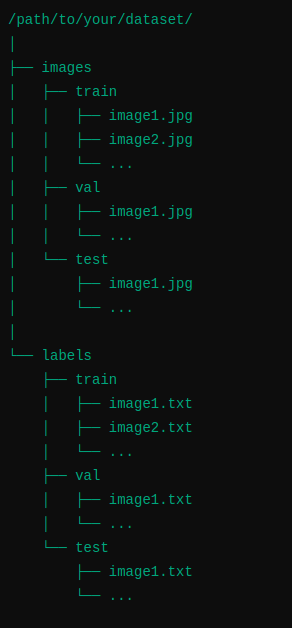


In each `.txt` label file, the annotations should be in the following format:
<category> <x_center> <y_center> <width> <height>

All values are normalized (between 0 and 1) relative to the image width and height.


# Step 3: Configure the Dataset for YOLOv5

Next, we need to create a YAML file that describes the dataset structure and classes.
This file will be used by YOLOv5 during training and evaluation.

Example data.yaml file:

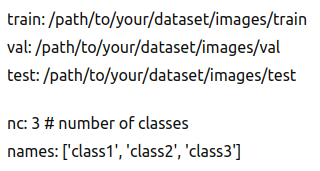



In this YAML file:
- `train`, `val`, and `test` specify the paths to the corresponding image folders.
- `nc` is the number of classes in the dataset.
- `names` lists the names of the classes.

Create this YAML file manually or programmatically.



In [3]:
# Download the dataset
import zipfile

url = 'https://drive.google.com/uc?id=1w0xigcHNMuzeFcj0tPpDY7S7n8mpDOmN'
output = 'object_detection.zip'

gdown.download(url, output, quiet=False)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('datasets')

Downloading...
From: https://drive.google.com/uc?id=1w0xigcHNMuzeFcj0tPpDY7S7n8mpDOmN
To: /content/object_detection.zip
100%|██████████| 3.89M/3.89M [00:00<00:00, 82.3MB/s]


Create the Yaml File for the dataset.



In [2]:
import yaml

# Define the data structure
data = {
    'model': 'YOLOv5s',
    'path': '../datasets/object_detection_data',
    'train': 'train/images',  # 47 images
    'val': 'val/images',      # 47 images
    'names': {
        0: 'Mug',
        1: 'Keyboard',
        2: 'Trainers',
        3: 'ZombieThor',
        4: 'Mouse',
        5: 'Fan',
        6: 'Monitor',
        7: 'Keys',
        8: 'Drawer',
        9: 'Sunglasses',
        10: 'PlasticBottle'
    },
    'hyp': {
        'lr0': 0.0001,          # initial learning rate
        'lrf': 0.2,             # final learning rate
        'momentum': 0.937,
        'weight_decay': 0.0005,
        'warmup_epochs': 3,
        'warmup_momentum': 0.8,
        'warmup_bias_lr': 0.1
    }
}

# Write the data to a YAML file
with open('config.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("YAML file has been created successfully.")


YAML file has been created successfully.


# Step 4: Training the YOLOv5 Model

We are now ready to train our YOLOv5 model on the custom dataset.
We will use a pre-trained YOLOv5 model and fine-tune it on our dataset.

You can choose from different YOLOv5 models like yolov5s (small), yolov5m (medium), yolov5l (large), or yolov5x (extra large).
In this example, we will use yolov5s.

Training parameters include:
- `epochs`: Number of epochs to train the model.
- `imgsz`: Image size to resize input images.
- `batch`: Batch size.


In [4]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='config.yaml', epochs=100, batch=16, imgsz=640)  # train the model

100%|██████████| 6.25M/6.25M [00:00<00:00, 68.5MB/s]


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/datasets/object_detection_data/train/labels... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<00:00, 1197.80it/s]

train: New cache created: /content/datasets/object_detection_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/object_detection_data/val/labels... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<00:00, 1742.76it/s]

val: New cache created: /content/datasets/object_detection_data/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.34G       1.17      3.933      1.304         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         47        137    0.00643      0.568     0.0489     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.28G      1.261      3.959      1.382         78        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         47        137    0.00676      0.579     0.0566     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G      1.144      3.923      1.317         61        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


                   all         47        137    0.00767      0.641     0.0818      0.062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.3G      1.075      3.818      1.257         99        640: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         47        137    0.00846      0.727      0.112     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.27G      1.044      3.722      1.181         92        640: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         47        137    0.00946      0.755      0.147      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.3G     0.9462      3.478      1.159         86        640: 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         47        137    0.00969      0.806      0.179       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.3G     0.9478       3.37      1.134         75        640: 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         47        137     0.0104      0.824      0.212      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.15G     0.9548      3.161      1.145         93        640: 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         47        137     0.0111      0.841      0.221      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.29G     0.9838      2.955      1.151         79        640: 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         47        137     0.0122      0.862      0.237      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.28G      1.004      2.796      1.226         72        640: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         47        137     0.0131      0.907      0.258      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.15G     0.9487      2.613      1.158         90        640: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         47        137          1     0.0511      0.349      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.29G     0.9151      2.568       1.19         98        640: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         47        137          1     0.0812      0.363      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.29G     0.9188      2.349      1.178         52        640: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         47        137      0.993      0.165      0.376      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.3G     0.9503      2.249      1.157         91        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         47        137      0.993      0.171      0.383      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.29G     0.8449      1.986      1.114         96        640: 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         47        137      0.896      0.184      0.411       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.28G     0.8816      1.941      1.131         80        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         47        137      0.921      0.207      0.423      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.3G     0.9377      1.831      1.179         90        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         47        137      0.933      0.198      0.478       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.28G     0.9422      1.942      1.199         97        640: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         47        137      0.931      0.181      0.533      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.31G     0.9191      1.798      1.127         89        640: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         47        137      0.855      0.256      0.582      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.31G     0.9072      1.759      1.146         94        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         47        137      0.881      0.349      0.608      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.28G     0.8954      1.658      1.149         95        640: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         47        137      0.767       0.39      0.643      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.31G     0.8988       1.56      1.157         94        640: 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         47        137      0.795      0.415      0.672      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.31G     0.8914      1.576      1.122         85        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         47        137       0.81      0.461       0.69      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.28G     0.7974      1.379      1.076         96        640: 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         47        137      0.791      0.472      0.721      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.3G     0.8397      1.293      1.109         96        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         47        137      0.857      0.519      0.731      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.28G      0.868      1.447      1.135         72        640: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         47        137      0.819      0.527      0.737      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.3G     0.8009      1.405      1.115         70        640: 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         47        137      0.825      0.553      0.772      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.29G     0.8282        1.4      1.131         76        640: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


                   all         47        137      0.775      0.592      0.807      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.3G     0.8331      1.327       1.08         96        640: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         47        137      0.775      0.592      0.807      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.3G     0.8454      1.313      1.112         74        640: 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         47        137      0.678      0.632      0.826      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.3G     0.7612      1.275      1.069         89        640: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         47        137      0.841      0.668      0.848      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.3G        0.8      1.262      1.062         83        640: 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         47        137       0.87      0.721      0.879      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.31G     0.7495      1.163      1.054        108        640: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         47        137       0.87      0.721      0.879      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.29G     0.8078      1.176      1.077         87        640: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         47        137      0.864      0.755      0.891      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.3G     0.7749      1.222      1.091         86        640: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         47        137       0.89      0.792      0.918      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.29G      0.798      1.196      1.096         81        640: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         47        137      0.921      0.804      0.924      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.3G     0.8346      1.168      1.126         70        640: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         47        137      0.921      0.804      0.924      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.3G     0.7502       1.23      1.077         76        640: 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         47        137      0.892      0.837      0.935      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.31G     0.7421      1.155      1.068         85        640: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         47        137      0.879      0.853      0.942      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.3G     0.7518      1.161      1.081         78        640: 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         47        137      0.871      0.895      0.947      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.3G     0.7602      1.127       1.04         94        640: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         47        137      0.871      0.895      0.947      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.31G     0.7312      1.136      1.058         71        640: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         47        137      0.897       0.92      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.28G     0.7774      1.075      1.045         83        640: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         47        137      0.922      0.905      0.968      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.3G     0.7478      1.084      1.048        105        640: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         47        137      0.883      0.946      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.29G     0.7329      1.016      1.039         84        640: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         47        137      0.883      0.946      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.31G     0.7594      0.987      1.043        104        640: 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         47        137      0.896      0.964       0.98      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.3G     0.7063      1.019      1.066         74        640: 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         47        137      0.889      0.956      0.976      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.3G      0.723     0.9813      1.041         93        640: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         47        137      0.884      0.964      0.977       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.31G     0.7165      1.015      1.029         95        640: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         47        137      0.884      0.964      0.977       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.3G     0.7065      1.017      1.036         79        640: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         47        137      0.892      0.951      0.977      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.29G      0.744      1.007      1.074         67        640: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         47        137      0.938      0.928      0.984      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.3G     0.7036     0.9838      1.036        104        640: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         47        137      0.914      0.966      0.983      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.3G     0.7444      1.009      1.092         81        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         47        137      0.914      0.966      0.983      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.29G     0.7189      1.048      1.056         65        640: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         47        137      0.937      0.963      0.982      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.3G     0.7031      1.022      1.047         91        640: 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         47        137      0.922      0.969      0.987      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.29G     0.6847      1.043      1.055         83        640: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         47        137      0.926      0.962      0.988      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.28G     0.6909      1.045      1.041         74        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         47        137      0.926      0.962      0.988      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.29G     0.6432     0.9779      1.004         89        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


                   all         47        137      0.944      0.966      0.992      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.3G     0.6814      1.043      1.079         88        640: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         47        137      0.948      0.974      0.994       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.29G     0.7064     0.9734      1.019        109        640: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         47        137      0.952      0.976      0.994      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.3G     0.7067     0.9955      1.024         77        640: 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         47        137      0.952      0.976      0.994      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.31G     0.6924     0.9763      1.019         90        640: 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         47        137      0.952      0.983      0.994       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.18G     0.6244     0.8708      0.982        100        640: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         47        137      0.933      0.989      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.3G     0.6758     0.9534      1.026         64        640: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         47        137       0.96      0.964      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.28G     0.6729     0.9377      1.015         94        640: 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         47        137       0.96      0.964      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.29G     0.6459     0.9076      1.024         72        640: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         47        137      0.947      0.982      0.994      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.31G     0.5866     0.7864     0.9379        108        640: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         47        137      0.948      0.983      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.3G     0.6046     0.8385     0.9715         79        640: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         47        137      0.948      0.984      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.29G     0.6703     0.9594      1.064         75        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         47        137      0.948      0.984      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.3G     0.6108     0.8598     0.9907         90        640: 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         47        137      0.949      0.996      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.29G     0.6104     0.8762     0.9722        100        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         47        137      0.953      0.989      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.3G     0.6457     0.8845      1.022         82        640: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         47        137      0.963      0.975      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.15G        0.6     0.8584     0.9819         85        640: 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


                   all         47        137      0.963      0.975      0.995      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.31G     0.5835     0.8248     0.9793         86        640: 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         47        137      0.967      0.967      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.3G     0.6067     0.8332      0.967         83        640: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


                   all         47        137      0.953       0.98      0.995      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.3G     0.6045     0.8431       1.03         79        640: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         47        137       0.95      0.982      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.29G     0.6121     0.8436      1.018         77        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         47        137       0.95      0.982      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.31G     0.6077     0.8366     0.9977         86        640: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         47        137      0.955      0.971      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.3G     0.5935     0.8446     0.9706         94        640: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         47        137      0.966      0.954      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.14G     0.6244     0.8599      1.003         82        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         47        137      0.954      0.971      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.29G     0.5985     0.8698     0.9853         82        640: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         47        137      0.954      0.971      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.3G     0.5993     0.7961     0.9493         97        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         47        137      0.965      0.977      0.995      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.29G     0.5979     0.8254     0.9746        116        640: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         47        137      0.971      0.987      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.28G     0.5744     0.8438     0.9688         59        640: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         47        137      0.977       0.99      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.28G      0.591     0.8175     0.9772         90        640: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         47        137      0.977       0.99      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.19G      0.574     0.8284     0.9766         61        640: 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         47        137      0.978      0.995      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.28G     0.5921     0.8097     0.9764        107        640: 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         47        137      0.983      0.995      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.3G     0.5585     0.8567     0.9806         75        640: 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         47        137      0.986      0.996      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.18G     0.5806     0.8041     0.9621         84        640: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]


                   all         47        137      0.986      0.996      0.995      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.29G     0.5452     0.7555     0.9487         96        640: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         47        137      0.985      0.997      0.995      0.939


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.3G     0.4789     0.8892     0.8986         44        640: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         47        137      0.984      0.998      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.3G      0.541     0.9709     0.9342         42        640: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         47        137      0.984          1      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.29G     0.5121     0.9838     0.9383         53        640: 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         47        137      0.984          1      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.27G     0.4768     0.8916     0.8849         49        640: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         47        137      0.983          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.3G     0.4907     0.8879     0.9117         43        640: 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         47        137      0.982          1      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.27G     0.5468      0.941      0.985         50        640: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


                   all         47        137      0.982          1      0.995      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.3G     0.4843     0.8996     0.9023         52        640: 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         47        137      0.982          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.29G     0.4682     0.8754     0.9023         41        640: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         47        137      0.981      0.997      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.3G     0.5142     0.9072     0.9371         40        640: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         47        137      0.981      0.998      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.27G     0.4586     0.8791      0.876         39        640: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         47        137      0.981      0.995      0.995      0.934



100 epochs completed in 0.062 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         47        137      0.984          1      0.995       0.95
                   Mug         15         15       0.99          1      0.995      0.952
              Keyboard         14         15      0.989          1      0.995      0.936
              Trainers         13         16          1      0.996      0.995      0.893
            ZombieThor         15         15      0.995          1      0.995      0.931
                 Mouse         15         15      0.991          1      0.995      0.907
                   Fan         10         11      0.987          1      0.995      0.952
               Monitor         18         33      0.993          1      0.995      0.983
                  Keys          4          4      0.968          1      0.995      0.958
                Drawer          3          3      0.947          1      0.995      0.995
            Sunglasses          4          4      0.992          1      0.995      0.945
         PlasticBottl

In [ ]:
label_dict = {0: 'Mug', 1: 'Keyboard', 2: 'Trainers', 3: 'ZombieThor', 4: 'Mouse', 5: 'Fan', 6: 'Monitor',
7: 'Keys', 8: 'Drawer', 9: 'Sunglasses', 10: 'PlasticBottle'}
print(label_dict.values())

dict_values(['Mug', 'Keyboard', 'Trainers', 'ZombieThor', 'Mouse', 'Fan', 'Monitor', 'Keys', 'Drawer', 'Sunglasses', 'PlasticBottle'])


# Step 5: Evaluate the Model

After training, we need to evaluate the model's performance on the test set.
YOLOv5 provides built-in functionality to evaluate the model and generate metrics like precision, recall, mAP, etc.






In [7]:
# Evaluate the model on the test set
metrics = model.val(data='config.yaml', split='val')


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/datasets/object_detection_data/val/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


                   all         47        137      0.984          1      0.995      0.947
                   Mug         15         15       0.99          1      0.995      0.952
              Keyboard         14         15      0.989          1      0.995      0.936
              Trainers         13         16          1      0.996      0.995      0.887
            ZombieThor         15         15      0.995          1      0.995      0.907
                 Mouse         15         15      0.991          1      0.995      0.907
                   Fan         10         11      0.987          1      0.995      0.952
               Monitor         18         33      0.993          1      0.995      0.986
                  Keys          4          4      0.968          1      0.995      0.958
                Drawer          3          3      0.947          1      0.995      0.995
            Sunglasses          4          4      0.992          1      0.995      0.945
         PlasticBottl

Excellent result almost 98% aggregate.

# Step 8: Save the Model
Finally, we save the trained model to a file.
This allows us to reload the model later for further inference or transfer learning.



In [22]:
# Save the model
model.save('best.pt')





The model is saved as 'best.pt' and can be reloaded using the YOLO class.


In [27]:
## YOU CAN ALSO DOWNLOAD THE SAVED MODEL HERE, uncmment the below
# url = 'https://drive.google.com/uc?id=15-wJeOhlRPvy9m3aC9tihdNpntPDwJbn'
# output = 'best.pt'

# gdown.download(url, output, quiet=False)
# print("Model has been downloaded successfully.")

Downloading...
From: https://drive.google.com/uc?id=15-wJeOhlRPvy9m3aC9tihdNpntPDwJbn
To: /content/best.pt
100%|██████████| 6.14M/6.14M [00:01<00:00, 5.25MB/s]

Model has been downloaded successfully.


Now Let's test our saved model on a recorded video!

We are going to download the video from Google drive.

In [24]:
url = 'https://drive.google.com/uc?id=1RRXF1PbxnGhasqjc5JR6ev0rqcFFzgAk'
video_path = 'obj_test_video.mp4'

gdown.download(url, video_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RRXF1PbxnGhasqjc5JR6ev0rqcFFzgAk
To: /content/obj_test_video.mp4
100%|██████████| 46.0M/46.0M [00:00<00:00, 202MB/s]


'obj_test_video.mp4'

In [26]:
# Load the YOLO model (using a pre-trained model here)
model = YOLO('best.pt')  # Replace with the path to your custom-trained YOLO model if necessary
import random



def get_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        colors.append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
    return colors


colors = get_random_colors(len(model.names))

def process_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform inference using YOLO model
        results = model(frame)

        # Process the results and draw bounding boxes on the frame
        for result in results:
            boxes = result.boxes  # Access the detected bounding boxes
            for box in boxes:
                # Extract the bounding box coordinates, confidence score, and class ID
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())  # Convert to int for indexing
                label = model.names[cls]  # Get the label/class name
                color = colors[cls]
                # Draw bounding box and label on the frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)
                cv2.putText(frame, f'{label} {conf:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Write the frame to the output video
        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Path to the output video file
output_path = 'processed_obj_test_vid.mp4'

# Process the video and save the output
process_video(video_path, output_path)

# Display the processed video
from IPython.display import Video
Video(output_path, embed=True)


0: 640x384 1 Mug, 1 Monitor, 2 PlasticBottles, 12.3ms
Speed: 2.2ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Mug, 2 Monitors, 1 PlasticBottle, 11.9ms
Speed: 3.4ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Mug, 2 Monitors, 1 PlasticBottle, 9.7ms
Speed: 3.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Mug, 2 Monitors, 1 PlasticBottle, 12.2ms
Speed: 3.4ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Mug, 2 Monitors, 1 PlasticBottle, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Mug, 1 Monitor, 1 PlasticBottle, 9.2ms
Speed: 2.6ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Mug, 1 Monitor, 1 PlasticBottle, 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 

Download the video and play it on your local device.

In [31]:
from google.colab import files
files.download('processed_obj_test_vid.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>